# Постановка задачи
Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Вам нужно:
1.	Подготовить данные;
2.	Провести исследовательский анализ данных;
3.	Построить и обучить модель.
Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.
Следующий урок посвящён технологическому процессу очистки руды. Решите сами, какие детали нужны для построения модели, а какие — нет.


# Технологический процесс
Как золото получают из руды? Изучите внимательно стадии процесса.
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.
 
**Опишем каждую стадию:**

1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка 
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.
Описание данных

**Технологический процесс**
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant 
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Загрузка-основных-библиотек" data-toc-modified-id="Загрузка-основных-библиотек-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Загрузка основных библиотек</a></span></li><li><span><a href="#Загрузка-датафреймов" data-toc-modified-id="Загрузка-датафреймов-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Загрузка датафреймов</a></span></li></ul></li><li><span><a href="#Анализ-исходных-данных-(data_full)" data-toc-modified-id="Анализ-исходных-данных-(data_full)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ исходных данных (data_full)</a></span><ul class="toc-item"><li><span><a href="#Поиск-явных-дубликатов" data-toc-modified-id="Поиск-явных-дубликатов-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Поиск явных дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Период-исходных-данных" data-toc-modified-id="Период-исходных-данных-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Период исходных данных</a></span></li></ul></li><li><span><a href="#Анализ-обучающей-выборки-(data_train)" data-toc-modified-id="Анализ-обучающей-выборки-(data_train)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ обучающей выборки (data_train)</a></span><ul class="toc-item"><li><span><a href="#Поиск-явных-дубликатов" data-toc-modified-id="Поиск-явных-дубликатов-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Поиск явных дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Период-обучающей-выборки" data-toc-modified-id="Период-обучающей-выборки-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Период обучающей выборки</a></span></li><li><span><a href="#Проверка-формулы-вычисления-эффективности-обогащения" data-toc-modified-id="Проверка-формулы-вычисления-эффективности-обогащения-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Проверка формулы вычисления эффективности обогащения</a></span></li></ul></li><li><span><a href="#Анализ-тестовой-выборки-(data_test)" data-toc-modified-id="Анализ-тестовой-выборки-(data_test)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ тестовой выборки (data_test)</a></span><ul class="toc-item"><li><span><a href="#Поиск-явных-дубликатов" data-toc-modified-id="Поиск-явных-дубликатов-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Поиск явных дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Период-тестовой-выборки" data-toc-modified-id="Период-тестовой-выборки-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Период тестовой выборки</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке. Что это за параметры? К какому типу относятся?</a></span></li></ul></li><li><span><a href="#Выводы-по-разделу-подготовка-данных" data-toc-modified-id="Выводы-по-разделу-подготовка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы по разделу подготовка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах" data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах</a></span><ul class="toc-item"><li><span><a href="#Концентрация-золота-на-различных-этапах-технологического-процесса" data-toc-modified-id="Концентрация-золота-на-различных-этапах-технологического-процесса-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Концентрация золота на различных этапах технологического процесса</a></span></li><li><span><a href="#Концентрация-металла-серебро-на-различных-этапах-технологического-процесса" data-toc-modified-id="Концентрация-металла-серебро-на-различных-этапах-технологического-процесса-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Концентрация металла серебро на различных этапах технологического процесса</a></span></li><li><span><a href="#Концентрация-металла-свинец-на-различных-этапах-технологического-процесса" data-toc-modified-id="Концентрация-металла-свинец-на-различных-этапах-технологического-процесса-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Концентрация металла свинец на различных этапах технологического процесса</a></span></li></ul></li><li><span><a href="#Сравнение-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате." data-toc-modified-id="Анализ-суммарной-концентрации-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суммарной концентрации металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.</a></span></li><li><span><a href="#Выводы-по-разделу-Анализ-данных" data-toc-modified-id="Выводы-по-разделу-Анализ-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы по разделу Анализ данных</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция вычисления итоговой sMAPE</a></span></li><li><span><a href="#Подготовка-обучающих-данных-для-моделей" data-toc-modified-id="Подготовка-обучающих-данных-для-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка обучающих данных для моделей</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества-методом-кросс-валидации." data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-методом-кросс-валидации.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества методом кросс-валидации.</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-RandomForestRegressor" data-toc-modified-id="Модель-RandomForestRegressor-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Модель RandomForestRegressor</a></span></li><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li></ul></li><li><span><a href="#Выводы-по-разделу-Модель" data-toc-modified-id="Выводы-по-разделу-Модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы по разделу Модель</a></span></li><li><span><a href="#Проверка-качества-лучшей-модели" data-toc-modified-id="Проверка-качества-лучшей-модели-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка качества лучшей модели</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

#### Загрузка основных библиотек

In [1]:
import os
import pandas as pd
import numpy as np
from numpy.random import RandomState

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

#### Загрузка датафреймов

In [2]:
pth = 'C:/Users\Victoria/anaconda/envs/ds_practicum_env/gold_industry_full.csv'

pth1 = '/datasets/gold_industry_full.csv'

if os.path.exists(pth):
    data_full = pd.read_csv(pth)
elif os.path.exists(pth1):
    data_full = pd.read_csv(pth1)
else:
    print('Something is wrong')

In [3]:
pth2 = 'C:/Users/Victoria/anaconda/envs/ds_practicum_env/gold_industry_train.csv'

pth3 = '/datasets/gold_industry_train.csv'

if os.path.exists(pth2):
    data_train = pd.read_csv(pth2)
elif os.path.exists(pth3):
    data_train = pd.read_csv(pth3)
else:
    print('Something is wrong')

In [4]:
pth4 = 'C:/Users/Victoria/anaconda/envs/ds_practicum_env/gold_industry_test.csv'

pth5 = '/datasets/gold_industry_test.csv'

if os.path.exists(pth4):
    data_test = pd.read_csv(pth4)
elif os.path.exists(pth5):
    data_test = pd.read_csv(pth5)
else:
    print('Something is wrong')

### Анализ исходных данных (data_full)

In [5]:
display(data_full)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,10.013738,42.435181,5.719113,10.621027,6.459561,68.786981,2.314786,10.286797,1.171459,19.131121
19435,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,9.841210,43.440341,5.410126,10.868937,6.258693,67.839536,2.423143,10.382891,1.239738,18.544924
19436,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,10.119344,44.284117,5.437716,9.781181,6.057627,70.847012,2.161256,10.324415,0.961210,18.185262
19437,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,9.876374,43.339714,5.664983,10.168953,5.484318,72.659046,2.064422,10.475957,1.050592,17.525656


#### Поиск явных дубликатов

In [6]:
display(data_full.duplicated().sum())

0

**Вывод:** нет явных дубликатов в исходных данных

#### Обработка пропусков

In [7]:
dana_full_isna=data_full.isna().sum()/len(data_full)*100

In [8]:
dana_full_isna[dana_full_isna>0.1]

rougher.input.feed_pb                       0.514430
rougher.input.feed_sol                      0.509285
rougher.input.feed_size                     0.745923
rougher.input.floatbank10_sulfate           0.174906
rougher.state.floatbank10_e_air             2.242914
rougher.input.floatbank11_sulfate           0.226349
rougher.input.floatbank11_xanthate          2.330367
rougher.output.concentrate_sol              0.118319
primary_cleaner.input.sulfate               0.123463
primary_cleaner.input.depressant            0.190339
primary_cleaner.input.xanthate              0.535007
primary_cleaner.output.concentrate_pb       0.596739
primary_cleaner.output.concentrate_sol      1.903390
primary_cleaner.output.tail_pb              0.108030
primary_cleaner.output.tail_sol             0.318946
secondary_cleaner.state.floatbank2_a_air    1.131745
secondary_cleaner.state.floatbank2_b_air    0.118319
secondary_cleaner.output.tail_sol           8.992232
final.output.concentrate_sol                1.

In [9]:
#Для данных, в которых кол-во пропусков превышает 0.1% заменим пропуски на медианные значения
data_full['secondary_cleaner.output.tail_sol'] = data_full['secondary_cleaner.output.tail_sol'].fillna(data_full['secondary_cleaner.output.tail_sol'].mean())
data_full['rougher.state.floatbank10_e_air'] = data_full['rougher.state.floatbank10_e_air'].fillna(data_full['rougher.state.floatbank10_e_air'].mean())
data_full['rougher.input.floatbank11_xanthate'] = data_full['rougher.input.floatbank11_xanthate'].fillna(data_full['rougher.input.floatbank11_xanthate'].mean())
data_full['primary_cleaner.output.concentrate_sol'] = data_full['primary_cleaner.output.concentrate_sol'].fillna(data_full['primary_cleaner.output.concentrate_sol'].mean())
data_full['secondary_cleaner.state.floatbank2_a_air'] = data_full['secondary_cleaner.state.floatbank2_a_air'].fillna(data_full['secondary_cleaner.state.floatbank2_a_air'].mean())
data_full['final.output.concentrate_sol'] = data_full['final.output.concentrate_sol'].fillna(data_full['final.output.concentrate_sol'].mean())
data_full['rougher.input.feed_pb'] = data_full['rougher.input.feed_pb'].fillna(data_full['rougher.input.feed_pb'].mean())
data_full['rougher.input.feed_sol'] = data_full['rougher.input.feed_sol'].fillna(data_full['rougher.input.feed_sol'].mean())
data_full['rougher.input.feed_sol'] = data_full['rougher.input.feed_sol'].fillna(data_full['rougher.input.feed_sol'].mean())
data_full['rougher.input.feed_size'] = data_full['rougher.input.feed_size'].fillna(data_full['rougher.input.feed_size'].mean())
data_full['primary_cleaner.input.xanthate'] = data_full['primary_cleaner.input.xanthate'].fillna(data_full['primary_cleaner.input.xanthate'].mean())
data_full['primary_cleaner.output.concentrate_pb'] = data_full['primary_cleaner.output.concentrate_pb'].fillna(data_full['primary_cleaner.output.concentrate_pb'].mean())
data_full['final.output.tail_pb'] = data_full['final.output.tail_pb'].fillna(data_full['final.output.tail_pb'].mean())
data_full['rougher.input.floatbank10_sulfate'] = data_full['rougher.input.floatbank10_sulfate'].fillna(data_full['rougher.input.floatbank10_sulfate'].mean())
data_full['rougher.input.floatbank11_sulfate'] = data_full['rougher.input.floatbank11_sulfate'].fillna(data_full['rougher.input.floatbank11_sulfate'].mean())
data_full['rougher.output.concentrate_sol'] = data_full['rougher.output.concentrate_sol'].fillna(data_full['rougher.output.concentrate_sol'].mean())
data_full['primary_cleaner.input.sulfate'] = data_full['primary_cleaner.input.sulfate'].fillna(data_full['primary_cleaner.input.sulfate'].mean())
data_full['primary_cleaner.input.depressant'] = data_full['primary_cleaner.input.depressant'].fillna(data_full['primary_cleaner.input.depressant'].mean())
data_full['primary_cleaner.output.tail_pb'] = data_full['primary_cleaner.output.tail_pb'].fillna(data_full['primary_cleaner.output.tail_pb'].mean())
data_full['primary_cleaner.output.tail_sol'] = data_full['primary_cleaner.output.tail_sol'].fillna(data_full['primary_cleaner.output.tail_sol'].mean())
data_full['secondary_cleaner.state.floatbank2_b_air'] = data_full['secondary_cleaner.state.floatbank2_b_air'].fillna(data_full['secondary_cleaner.state.floatbank2_b_air'].mean())

In [10]:
#Данные, в которых кол-во пропусков больше 0 но меньше 0.1% - удалим
data_full.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
data_full

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,10.013738,42.435181,5.719113,10.621027,6.459561,68.786981,2.314786,10.286797,1.171459,19.131121
19435,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,9.841210,43.440341,5.410126,10.868937,6.258693,67.839536,2.423143,10.382891,1.239738,18.544924
19436,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,10.119344,44.284117,5.437716,9.781181,6.057627,70.847012,2.161256,10.324415,0.961210,18.185262
19437,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,9.876374,43.339714,5.664983,10.168953,5.484318,72.659046,2.064422,10.475957,1.050592,17.525656


In [11]:
data_full.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

**Вывод:** пропуски были заменены на медианные значения для данных, где количество пропусков превышало 0.1%, данные, количество пропусков в которых было менее 0.1% были удалены. Количество данных снизилось менее чем на 1% с 19439 до 19373. 

#### Период исходных данных

Выясним, данные за какие периоды есть в датасете. Для этого выведем на экран максимальные и минимальные значения столбца date

In [12]:
print('Минимальное значение:',data_full['date'].min())
print('Максимальное значение:',data_full['date'].max())

Минимальное значение: 2016-01-15 00:00:00
Максимальное значение: 2018-08-18 10:59:59


### Анализ обучающей выборки (data_train)

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


#### Поиск явных дубликатов

In [14]:
data_train

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,...,0.000000,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,...,0.000000,46.956275,3.076566,11.542302,6.929418,68.643324,1.567363,8.792890,3.120351,10.184715
14576,2017-12-09 11:59:59,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,...,0.000000,46.713954,3.224920,11.356233,6.803482,73.755150,1.529220,8.769645,3.141541,10.403181
14577,2017-12-09 12:59:59,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,...,0.000000,46.866780,3.195978,11.349355,6.862249,69.049291,1.612542,8.897321,3.130493,10.549470


In [15]:
display(data_train.duplicated().sum())

0

**Вывод:** нет явных дубликатов в обучающей выборке

#### Обработка пропусков

In [16]:
dana_train_isna=data_train.isna().sum()/len(data_full)*100

In [17]:
dana_train_isna[dana_train_isna>0.1]

rougher.input.feed_pb                       0.371651
rougher.input.feed_sol                      0.397460
rougher.input.feed_size                     0.521344
rougher.input.floatbank10_sulfate           0.160017
rougher.state.floatbank10_e_air             2.214422
rougher.input.floatbank11_sulfate           0.185826
rougher.input.floatbank11_xanthate          2.100862
primary_cleaner.input.sulfate               0.118722
primary_cleaner.input.depressant            0.144531
primary_cleaner.input.xanthate              0.314871
primary_cleaner.output.concentrate_pb       0.454240
primary_cleaner.output.concentrate_sol      1.367883
primary_cleaner.output.tail_sol             0.232282
secondary_cleaner.state.floatbank2_a_air    0.485211
secondary_cleaner.state.floatbank2_b_air    0.113560
secondary_cleaner.output.tail_sol           4.748877
final.output.concentrate_sol                0.991070
final.output.tail_pb                        0.387137
dtype: float64

In [18]:
#Для данных, в которых кол-во пропусков превышает 0.1% заменим пропуски на медианные значения
data_train['secondary_cleaner.output.tail_sol'] = data_train['secondary_cleaner.output.tail_sol'].fillna(data_train['secondary_cleaner.output.tail_sol'].mean())
data_train['rougher.state.floatbank10_e_air'] = data_train['rougher.state.floatbank10_e_air'].fillna(data_train['rougher.state.floatbank10_e_air'].mean())
data_train['rougher.input.floatbank11_xanthate'] = data_train['rougher.input.floatbank11_xanthate'].fillna(data_train['rougher.input.floatbank11_xanthate'].mean())
data_train['primary_cleaner.output.concentrate_sol'] = data_train['primary_cleaner.output.concentrate_sol'].fillna(data_train['primary_cleaner.output.concentrate_sol'].mean())
data_train['secondary_cleaner.state.floatbank2_a_air'] = data_train['secondary_cleaner.state.floatbank2_a_air'].fillna(data_train['secondary_cleaner.state.floatbank2_a_air'].mean())
data_train['final.output.concentrate_sol'] = data_train['final.output.concentrate_sol'].fillna(data_train['final.output.concentrate_sol'].mean())
data_train['rougher.input.feed_pb'] = data_train['rougher.input.feed_pb'].fillna(data_train['rougher.input.feed_pb'].mean())
data_train['rougher.input.feed_sol'] = data_train['rougher.input.feed_sol'].fillna(data_train['rougher.input.feed_sol'].mean())
data_train['rougher.input.feed_sol'] = data_train['rougher.input.feed_sol'].fillna(data_train['rougher.input.feed_sol'].mean())
data_train['rougher.input.feed_size'] = data_train['rougher.input.feed_size'].fillna(data_train['rougher.input.feed_size'].mean())
data_train['primary_cleaner.input.xanthate'] = data_train['primary_cleaner.input.xanthate'].fillna(data_train['primary_cleaner.input.xanthate'].mean())
data_train['primary_cleaner.output.concentrate_pb'] = data_train['primary_cleaner.output.concentrate_pb'].fillna(data_train['primary_cleaner.output.concentrate_pb'].mean())
data_train['final.output.tail_pb'] = data_train['final.output.tail_pb'].fillna(data_train['final.output.tail_pb'].mean())
data_train['rougher.input.floatbank10_sulfate'] = data_train['rougher.input.floatbank10_sulfate'].fillna(data_train['rougher.input.floatbank10_sulfate'].mean())
data_train['rougher.input.floatbank11_sulfate'] = data_train['rougher.input.floatbank11_sulfate'].fillna(data_train['rougher.input.floatbank11_sulfate'].mean())
data_train['rougher.output.concentrate_sol'] = data_train['rougher.output.concentrate_sol'].fillna(data_train['rougher.output.concentrate_sol'].mean())
data_train['primary_cleaner.input.sulfate'] = data_train['primary_cleaner.input.sulfate'].fillna(data_train['primary_cleaner.input.sulfate'].mean())
data_train['primary_cleaner.input.depressant'] = data_train['primary_cleaner.input.depressant'].fillna(data_train['primary_cleaner.input.depressant'].mean())
data_train['primary_cleaner.output.tail_pb'] = data_train['primary_cleaner.output.tail_pb'].fillna(data_train['primary_cleaner.output.tail_pb'].mean())
data_train['primary_cleaner.output.tail_sol'] = data_train['primary_cleaner.output.tail_sol'].fillna(data_train['primary_cleaner.output.tail_sol'].mean())
data_train['secondary_cleaner.state.floatbank2_b_air'] = data_train['secondary_cleaner.state.floatbank2_b_air'].fillna(data_train['secondary_cleaner.state.floatbank2_b_air'].mean())


In [19]:
#Данные, в которых кол-во пропусков больше 0 но меньше 0.1% - удалим
data_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
data_train

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,...,0.000000,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,...,0.000000,46.956275,3.076566,11.542302,6.929418,68.643324,1.567363,8.792890,3.120351,10.184715
14576,2017-12-09 11:59:59,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,...,0.000000,46.713954,3.224920,11.356233,6.803482,73.755150,1.529220,8.769645,3.141541,10.403181
14577,2017-12-09 12:59:59,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,...,0.000000,46.866780,3.195978,11.349355,6.862249,69.049291,1.612542,8.897321,3.130493,10.549470


In [20]:
data_train.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

**Вывод:** пропуски были заменены на медианные значения для данных, где количество пропусков превышало 0.1%, данные, количество пропусков в которых было менее 0.1% были удалены. Количество данных снизилось менее чем на 1% с 14579 до 14528. 

#### Период обучающей выборки

In [21]:
print('Минимальное значение:',data_train['date'].min())
print('Максимальное значение:',data_train['date'].max())

Минимальное значение: 2016-01-15 00:00:00
Максимальное значение: 2017-12-09 13:59:59


**Вывод:** модель будет обучаться на данных, собрананных за два года (в 2016 и 2017 гг)

#### Проверка формулы вычисления эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery.

In [22]:
data_train['rougher.output.recovery_calculation']=100*(data_train['rougher.output.concentrate_au']* (data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))

 Найдем MAE между вашими расчётами и значением признака.

In [23]:
mae = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher.output.recovery_calculation'])
print('MAE между нашими расчетами и значениями признака составляет:', mae)

MAE между нашими расчетами и значениями признака составляет: 1.1196195708192582e-14


**Вывод:** эффективность обогащения для чернового концентрата (rougher.output.recovery) рассчитана корректно.

### Анализ тестовой выборки (data_test)

In [24]:
data_test

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


#### Поиск явных дубликатов

In [25]:
display(data_test.duplicated().sum())

0

**Вывод:** нет явных дубликатов в тестовых данных

#### Обработка пропусков

In [26]:
dana_test_isna=data_full.isna().sum()/len(data_full)*100

In [27]:
dana_test_isna[dana_train_isna>0.1]

rougher.input.feed_pb                       0.0
rougher.input.feed_sol                      0.0
rougher.input.feed_size                     0.0
rougher.input.floatbank10_sulfate           0.0
rougher.state.floatbank10_e_air             0.0
rougher.input.floatbank11_sulfate           0.0
rougher.input.floatbank11_xanthate          0.0
primary_cleaner.input.sulfate               0.0
primary_cleaner.input.depressant            0.0
primary_cleaner.input.xanthate              0.0
primary_cleaner.output.concentrate_pb       0.0
primary_cleaner.output.concentrate_sol      0.0
primary_cleaner.output.tail_sol             0.0
secondary_cleaner.state.floatbank2_a_air    0.0
secondary_cleaner.state.floatbank2_b_air    0.0
secondary_cleaner.output.tail_sol           0.0
final.output.concentrate_sol                0.0
final.output.tail_pb                        0.0
dtype: float64

In [28]:
#Для данных, в которых кол-во пропусков превышает 0.1% заменим пропуски на медианные значения
data_test['rougher.state.floatbank10_e_air'] = data_test['rougher.state.floatbank10_e_air'].fillna(data_test['rougher.state.floatbank10_e_air'].mean())
data_test['rougher.input.floatbank11_xanthate'] = data_test['rougher.input.floatbank11_xanthate'].fillna(data_test['rougher.input.floatbank11_xanthate'].mean())
data_test['secondary_cleaner.state.floatbank2_a_air'] = data_test['secondary_cleaner.state.floatbank2_a_air'].fillna(data_test['secondary_cleaner.state.floatbank2_a_air'].mean())
data_test['rougher.input.feed_pb'] = data_test['rougher.input.feed_pb'].fillna(data_test['rougher.input.feed_pb'].mean())
data_test['rougher.input.feed_sol'] = data_test['rougher.input.feed_sol'].fillna(data_test['rougher.input.feed_sol'].mean())
data_test['rougher.input.feed_sol'] = data_test['rougher.input.feed_sol'].fillna(data_test['rougher.input.feed_sol'].mean())
data_test['rougher.input.feed_size'] = data_test['rougher.input.feed_size'].fillna(data_test['rougher.input.feed_size'].mean())
data_test['primary_cleaner.input.xanthate'] = data_test['primary_cleaner.input.xanthate'].fillna(data_test['primary_cleaner.input.xanthate'].mean())
data_test['rougher.input.floatbank10_sulfate'] = data_test['rougher.input.floatbank10_sulfate'].fillna(data_test['rougher.input.floatbank10_sulfate'].mean())
data_test['rougher.input.floatbank11_sulfate'] = data_test['rougher.input.floatbank11_sulfate'].fillna(data_test['rougher.input.floatbank11_sulfate'].mean())


In [29]:
#Данные, в которых кол-во пропусков больше 0 но меньше 0.1% - удалим
data_test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
data_test

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


In [30]:
data_test.isna().sum()

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

**Вывод:** пропуски были заменены на медианные значения для данных, где количество пропусков превышало 0.1%, данные, количество пропусков в которых было менее 0.1% были удалены. Количество данных снизилось менее чем на 1% с 4860 до 4847. 

#### Период тестовой выборки

In [31]:
print('Минимальное значение:',data_test['date'].min())
print('Максимальное значение:',data_test['date'].max())

Минимальное значение: 2017-12-09 14:59:59
Максимальное значение: 2018-08-18 10:59:59


**Вывод:** модель будет тестироваться на данных, собрананных за 9 месяцев (начиная с декабря 2017 г до августа 2018 г)

#### Анализ признаков, недоступных в тестовой выборке. Что это за параметры? К какому типу относятся?

В тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей. 

In [32]:
not_in_test = set(data_train.columns) - set(data_test.columns)
not_in_test
print('\nКоличество отсутствующих признаков -', len(not_in_test))


Количество отсутствующих признаков - 35


In [33]:
delete_from_train_list=[
'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery_calculation',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol']

Добавим в тестовую выборку целевые признаки, используя метод merge, в качестве индексов используем колонку date (данные индексируются датой и временем получения информации)

In [34]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

**Вывод:** В тестовой выборке нет целевых признаков (recovery), нет параметров продукта на разных стадиях (output), нет информации о содержании металлов в хвостах (tail), нет некоторых расчетных характеристик (calculations)
Тип данных float64

### Выводы по разделу подготовка данных

- в данных нет явных дубликатов
- пропуски были заменены на медианные значения для данных, прочие значения были удалены,  после обработки пропусков количество данных снизилось менее чем на 1% 
- датафрейм включает в себя данные за 2016-2018 гг (обучающая выборка - за 2016 и 2017 гг, тестовая выборка - за 8 месяцев 2018 г)
- обучающая выборка поделена 75% - обучающая, 25% - тестовая (14528 - train, test 4847б итого 19375)
- эффективность обогащения для чернового концентрата (rougher.output.recovery) рассчитана корректно
- В тестовой выборке отсутствуют признаки, которые есть в обучающей. Количетсво отсутствующих признаков - 35. Нет целевых признаков (recovery), нет параметров продукта на разных стадиях (output), нет информации о содержании металлов в хвостах (tail), нет некоторых расчетных характеристик (calculations) 



## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах

Проанализируем как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

#### Концентрация золота на различных этапах технологического процесса

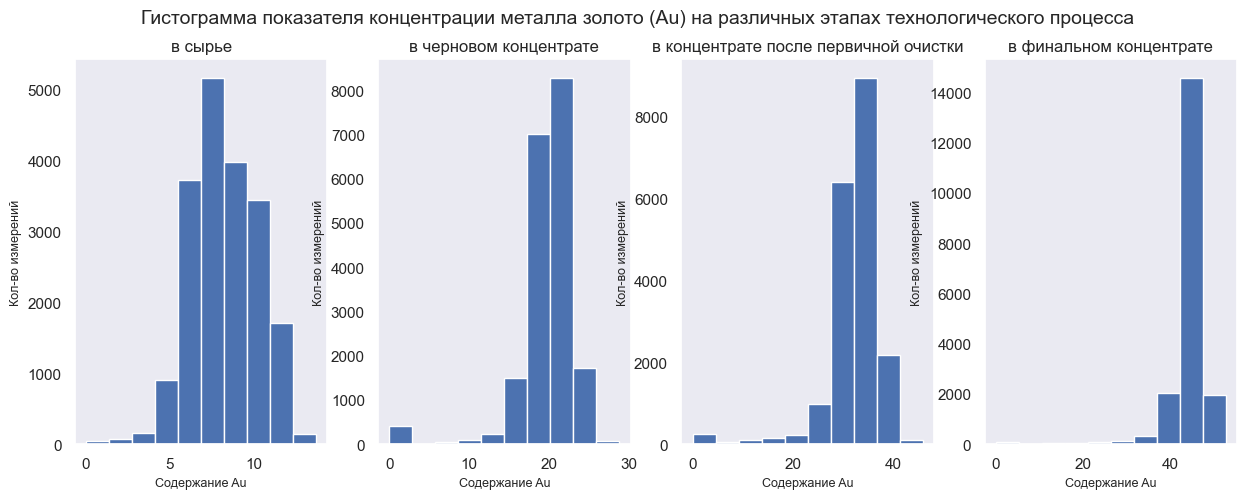

Среднее значение содержания золота в сырье 8.26940176033795
Среднее значение содержания золота в конечном продукте 44.10471322677033


In [35]:
plt.subplots(figsize=(15,5))

plt.suptitle('Гистограмма показателя концентрации металла золото (Au) на различных этапах технологического процесса', fontsize = 14)

plt.subplot(1, 4, 1)
plt.hist(data_full['rougher.input.feed_au'])
plt.title('в сырье' , fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Au', fontsize=9)
plt.grid()


plt.subplot(1, 4, 2)
plt.hist(data_full['rougher.output.concentrate_au'])

plt.title('в черновом концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Au', fontsize=9)

plt.grid()

plt.subplot(1, 4, 3)
plt.hist(data_full['primary_cleaner.output.concentrate_au'])

plt.title('в концентрате после первичной очистки', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Au', fontsize=9)

plt.grid()

plt.subplot(1, 4, 4)
plt.hist(data_full['final.output.concentrate_au'])

plt.title('в финальном концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Au', fontsize=9)

plt.grid()

plt.show()

sns.set()

print('Среднее значение содержания золота в сырье',(data_full['rougher.input.feed_au']).mean())
print('Среднее значение содержания золота в конечном продукте',(data_full['final.output.concentrate_au']).mean())

**Вывод:** 
- среднее значение концентрации золота выросло с 8.27 до 44.10
- распределения данных можно охарактеризовать как нормальные

#### Концентрация металла серебро на различных этапах технологического процесса

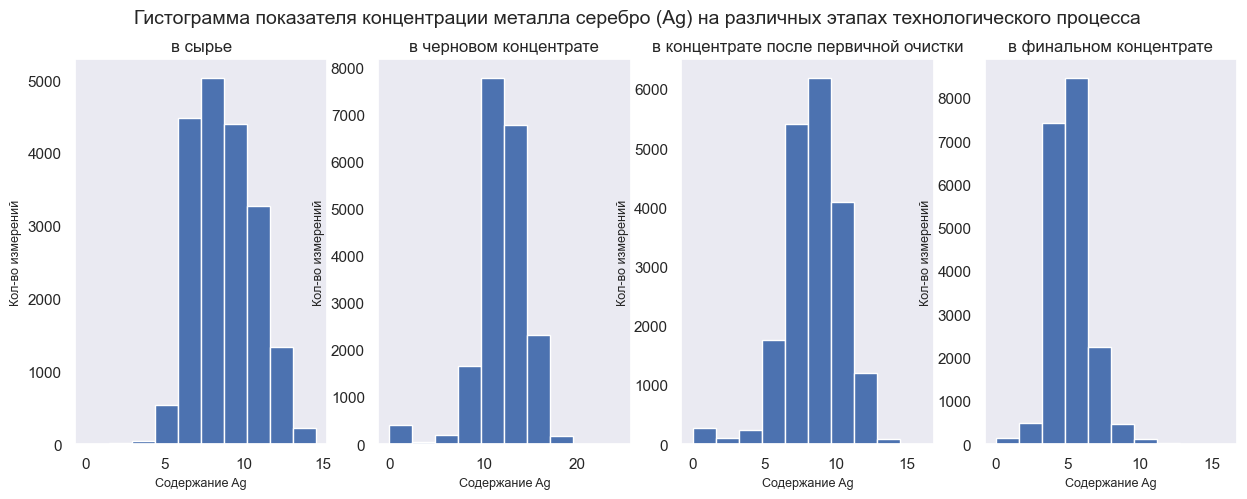

Среднее значение содержания серебра в сырье 8.797444174676944
Среднее значение содержания серебра в конечном продукте 5.169490355547787


In [36]:
plt.subplots(figsize=(15,5))

plt.suptitle('Гистограмма показателя концентрации металла серебро (Ag) на различных этапах технологического процесса', fontsize = 14)

plt.subplot(1, 4, 1)
plt.hist(data_full['rougher.input.feed_ag'])
plt.title('в сырье' , fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Ag', fontsize=9)
plt.grid()


plt.subplot(1, 4, 2)
plt.hist(data_full['rougher.output.concentrate_ag'])

plt.title('в черновом концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Ag', fontsize=9)

plt.grid()

plt.subplot(1, 4, 3)
plt.hist(data_full['primary_cleaner.output.concentrate_ag'])

plt.title('в концентрате после первичной очистки', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Ag', fontsize=9)

plt.grid()

plt.subplot(1, 4, 4)
plt.hist(data_full['final.output.concentrate_ag'])

plt.title('в финальном концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Ag', fontsize=9)

plt.grid()

plt.show()

sns.set()

print('Среднее значение содержания серебра в сырье',(data_full['rougher.input.feed_ag']).mean())
print('Среднее значение содержания серебра в конечном продукте',(data_full['final.output.concentrate_ag']).mean())

**Вывод:** 
- среднее значение концентрации серебра снизилось с 8.79 до 5.17
- распределения данных можно охарактеризовать как нормальные

#### Концентрация металла свинец на различных этапах технологического процесса

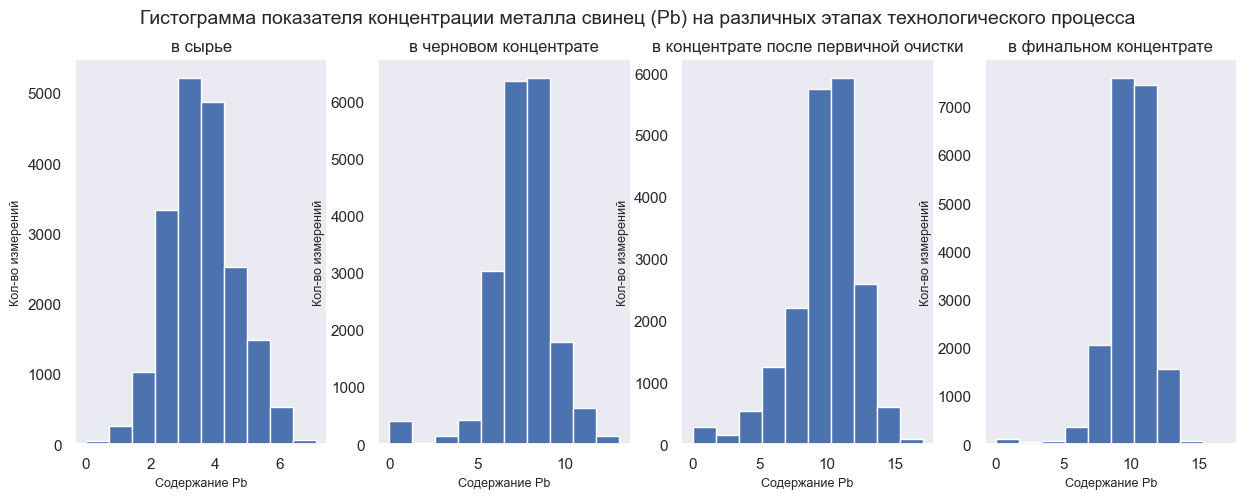

Среднее значение содержания свинца в сырье 3.599496662496048
Среднее значение содержания свинца в конечном продукте 9.983890902169174


In [37]:
plt.subplots(figsize=(15,5))

plt.suptitle('Гистограмма показателя концентрации металла свинец (Pb) на различных этапах технологического процесса', fontsize = 14)

plt.subplot(1, 4, 1)
plt.hist(data_full['rougher.input.feed_pb'])
plt.title('в сырье' , fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Pb', fontsize=9)
plt.grid()


plt.subplot(1, 4, 2)
plt.hist(data_full['rougher.output.concentrate_pb'])

plt.title('в черновом концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Pb', fontsize=9)

plt.grid()

plt.subplot(1, 4, 3)
plt.hist(data_full['primary_cleaner.output.concentrate_pb'])

plt.title('в концентрате после первичной очистки', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Pb', fontsize=9)

plt.grid()

plt.subplot(1, 4, 4)
plt.hist(data_full['final.output.concentrate_pb'])

plt.title('в финальном концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание Pb', fontsize=9)

plt.grid()

plt.show()

sns.set()

print('Среднее значение содержания свинца в сырье',(data_full['rougher.input.feed_pb']).mean())
print('Среднее значение содержания свинца в конечном продукте',(data_full['final.output.concentrate_pb']).mean())

**Вывод:** 
- среднее значение концентрации свинца увеличилось с 3.60 до 9.98
- распределения данных можно охарактеризовать как нормальные

### Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках

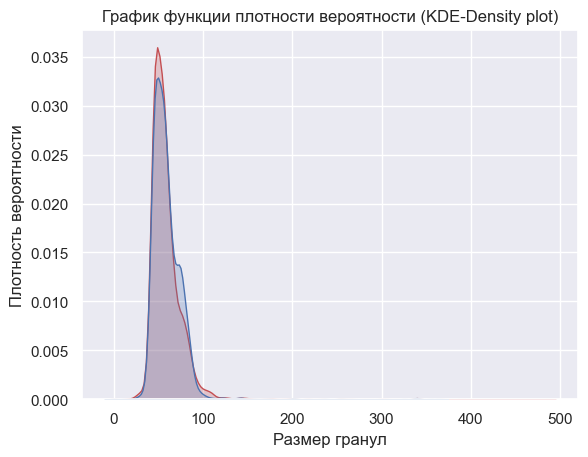

In [38]:
sns.kdeplot(data_train['rougher.input.feed_size'], color='r', shade=True, label='Тренировочная выборка')
  
sns.kdeplot(data_test['rougher.input.feed_size'], color='b', shade=True, label='Тестовая выборка')
  
plt.xlabel('Размер гранул');
plt.ylabel('Плотность вероятности');
plt.title('График функции плотности вероятности (KDE-Density plot)');


**Вывод:** 
- данные по размерам гранул нормально распределены как на тренировочнок, так и на тестовой выборках
- средние на двух выборках не сильно различаются

### Анализ суммарной концентрации металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

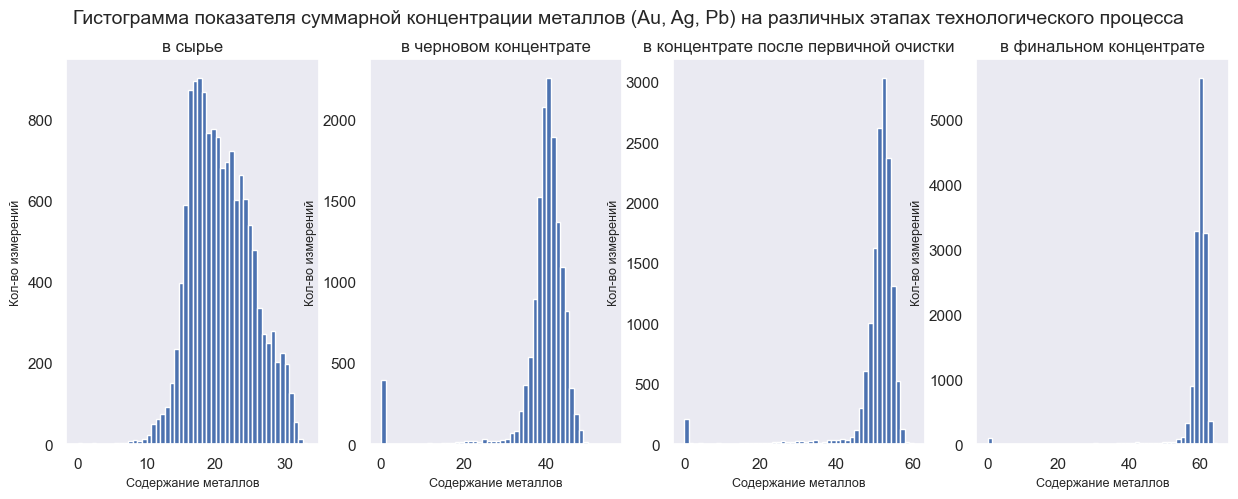

Среднее значение содержания металлов в сырье 20.84201810870112
Среднее значение содержания металлов в конечном продукте 59.13999891354401


In [39]:
plt.subplots(figsize=(15,5))

plt.suptitle('Гистограмма показателя суммарной концентрации металлов (Au, Ag, Pb) на различных этапах технологического процесса', fontsize = 14)

plt.subplot(1, 4, 1)
plt.hist(data_train['rougher.input.feed_au']+data_train['rougher.input.feed_ag']+data_train['rougher.input.feed_pb'], bins=int(50))
plt.title('в сырье' , fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание металлов', fontsize=9)
plt.grid()


plt.subplot(1, 4, 2)
plt.hist(data_train['rougher.output.concentrate_au']+data_train['rougher.output.concentrate_ag']+data_train['rougher.output.concentrate_pb'],bins=int(50))

plt.title('в черновом концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание металлов', fontsize=9)

plt.grid()

plt.subplot(1, 4, 3)
plt.hist(data_train['primary_cleaner.output.concentrate_au']+data_train['primary_cleaner.output.concentrate_ag']+data_train['primary_cleaner.output.concentrate_pb'],bins=int(50))

plt.title('в концентрате после первичной очистки', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание металлов', fontsize=9)

plt.grid()

plt.subplot(1, 4, 4)
plt.hist(data_train['final.output.concentrate_au']+data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_pb'], bins=int(50))

plt.title('в финальном концентрате', fontsize = 12)
plt.ylabel('Кол-во измерений', fontsize=9)
plt.xlabel('Содержание металлов', fontsize=9)

plt.grid()

plt.show()

sns.set()

print('Среднее значение содержания металлов в сырье',(data_train['rougher.input.feed_au']+data_train['rougher.input.feed_ag']++data_train['rougher.input.feed_pb']).mean())
print('Среднее значение содержания металлов в конечном продукте',(data_train['final.output.concentrate_au']+data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_pb']).mean())


**Вывод:** 
- суммарная концентрация металлов растет от этапа к этапу, итого среднее значение выросло с 20.84 до 59.14
- в черновом концентрате присутствуют аномалии (значения в районе 0), необходимо их удалит, так как они могут негативно повлиять на качество обучения модели в последующем

In [40]:
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0) & (data_train['rougher.output.concentrate_ag'] != 0) & (data_train['rougher.output.concentrate_pb'] != 0) & (data_train['rougher.output.concentrate_sol'] != 0)]
data_train = data_train[(data_train['final.output.concentrate_au'] != 0) & (data_train['final.output.concentrate_ag'] != 0) & (data_train['final.output.concentrate_pb'] != 0) & (data_train['final.output.concentrate_sol'] != 0)]

data_full = data_full[(data_full['rougher.output.concentrate_au'] != 0) & (data_full['rougher.output.concentrate_ag'] != 0) & (data_full['rougher.output.concentrate_pb'] != 0) & (data_full['rougher.output.concentrate_sol'] != 0)]
data_full = data_full[(data_full['final.output.concentrate_au'] != 0) & (data_full['final.output.concentrate_ag'] != 0) & (data_full['final.output.concentrate_pb'] != 0) & (data_full['final.output.concentrate_sol'] != 0)]

### Выводы по разделу Анализ данных

- среднее значение концентрации золота и свинца растет от этапа к этапу технологического процесса
- среднее значение концентрации серебра снижается
- суммарная концентрация металлов также растет от этапа к этапу
- среднее значение размера гранул в тренировочной и тестовой выборке не сильно отличаются
- наблюдаются нормальные распределения данных анализируемых признаков

## Модель

### Функция вычисления итоговой sMAPE

In [41]:
def smape_func (target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [42]:
smape_scorer = make_scorer(smape_func, greater_is_better = False)

In [43]:
def final_smape_func (rougher, final):
    final_smape = 0.25*rougher+0.75*final
    return final_smape

### Подготовка обучающих данных для моделей

In [44]:
data_for_model=data_train.drop(delete_from_train_list, axis=1)

In [45]:
data_for_model=data_for_model.drop('date',axis=1)

###  Обучение разных моделей и оценка их качества методом кросс-валидации.

In [46]:
model_scores = {} #создадим список оценок точности моделей

#### Модель LinearRegression

Напишем модель для прогнозирования показателя эффективности обогащения чернового и финального концентрата (rougher.output.recovery, final.output.recovery).

**Признаки, с которыми будем работать:**

51 признак, который содержится как в тренировочной, так и в тестовой выборках (кроме целевых)

**Целевой признак**
- rougher.output.recovery — эффективность обогащения чернового концентрата
- final.output.recovery — эффективность обогащения финального концентрата

In [47]:
features_train = data_for_model.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_r = data_for_model['rougher.output.recovery']
target_train_f = data_for_model['final.output.recovery']

In [48]:
model_lr_r = LinearRegression()
smape_r = cross_val_score(model_lr_r,
                          features_train,
                          target_train_r,
                          scoring=smape_scorer,
                          cv=5)
final_smape_r = smape_r.mean()

model_lr_f = LinearRegression()
smape_f = cross_val_score(model_lr_f,
                        features_train,
                        target_train_f,
                        scoring=smape_scorer,
                        cv=5)
final_smape_f = smape_f.mean()

result_smape = final_smape_func(final_smape_r, final_smape_f)*(-1)
model_scores['Linear Regression'] = [result_smape]
print(result_smape)

9.123080900954356


#### Модель RandomForestRegressor

In [49]:
state = RandomState(12345)

In [ ]:
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_train,
                                  target_train_r,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_final = cross_val_score(model_rf_final,
                                features_train,
                                target_train_f,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        
        result_smape = final_smape_func(final_smape_rougher, final_smape_final)*(-1)

        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
model_scores['RandomForestRegressor'] = [best_model_for_rf]
print(best_model_for_rf)

#### Модель DecisionTreeRegressor

In [ ]:
best_result_for_dt = 100
best_param_for_dt = 0

for n in range(1, 10, 1):
    for k in range (1,10,2):
        model_dt_rougher = DecisionTreeRegressor(max_depth=n, min_samples_leaf = k, random_state=state)
        smape_rougher = cross_val_score(model_dt_rougher,
                              features_train,
                              target_train_r,
                              scoring=smape_scorer,
                              cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_dt_final = DecisionTreeRegressor(max_depth=n, min_samples_leaf = k, random_state=state)
        smape_final = cross_val_score(model_dt_final, 
                                  features_train,
                                  target_train_f,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_final = smape_final.mean()
        result_smape = final_smape_func(final_smape_rougher, final_smape_final)*(-1)
    
        if result_smape < best_result_for_dt:
            best_result_for_dt = result_smape
            best_param_for_dt = n

model_scores['DecisionTreeRegressor'] = [best_result_for_dt]
    
print(best_result_for_dt)

### Выводы по разделу Модель

In [ ]:
display(model_scores)

**Вывод:** лучшая метрика качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение») у модели RandomForestRegressor (чем меньше показатель, тем более точное предсказание модели)

### Проверка качества лучшей модели

In [ ]:
features_train_best = data_for_model.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_r_best = data_for_model['rougher.output.recovery']
target_train_f_best = data_for_model['final.output.recovery']

features_test = data_test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
target_test_r = data_test['rougher.output.recovery']
target_test_f = data_test['final.output.recovery']

In [ ]:
model_for_test_r = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_r.fit(features_train_best, target_train_r_best)
predicted_r = model_for_test_r.predict(features_test)

model_for_test_f = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model_for_test_f.fit(features_train_best, target_train_f_best)
predicted_f = model_for_test_f.predict(features_test)

smape_for_test_r = smape_func(target_test_r, predicted_r)
smape_for_test_f = smape_func(target_test_f, predicted_f)
final_smape_for_test = final_smape_func(smape_for_test_r, smape_for_test_f)

In [ ]:
dummy_regr_for_r = DummyRegressor(strategy="mean")
dummy_regr_for_f = DummyRegressor(strategy="mean")

dummy_regr_for_r.fit(features_train, target_train_r)
dummy_regr_for_f.fit(features_train, target_train_f)

dummy_predicted_r = dummy_regr_for_r.predict(features_test)
dummy_predicted_f = dummy_regr_for_f.predict(features_test)

smape_for_const_r = smape_func(target_test_r, dummy_predicted_r)
smape_for_const_f = smape_func(target_test_f, dummy_predicted_f)

final_smape_for_const = final_smape_func(smape_for_const_r, smape_for_const_f)

In [ ]:
print(f'\nSMAPE тестовой выборки - {round(final_smape_for_test,2)}')
print(f'\nSMAPE для константной модели - {round(final_smape_for_const,2)}')

**Вывод:** показатель SMAPE модели RandomForestRegressor намного меньше показателя для константной модели, что означает хорошее качество полученной модели.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке